# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [26]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import os
import matplotlib as mpl
import statistics

In [27]:
# CSV files (city_data)
PyBer_city_data = os.path.join('..', 'PyBer_Analysis', 'Resources', 'city_data.csv')
city_data_df = pd.read_csv(PyBer_city_data, encoding = "UTF-8")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [28]:
# CSV files (ride_data)
PyBer_ride_data = os.path.join('..', 'PyBer_Analysis', 'Resources', 'ride_data.csv')
ride_data_df = pd.read_csv(PyBer_ride_data, encoding = "UTF-8")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Merge the DataFrames

In [29]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [30]:
##  1. Get the total rides for each city type
sum_ride_data = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_ride_data

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [31]:
## 2. Get the total drivers for each city type
sum_driver_data = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_driver_data

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [32]:
##  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [33]:
##  4. Get the average fare per ride for each city type.

In [34]:
avg_fare_per_ride = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).count()["ride_id"]

avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [35]:
## 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"]).sum()["driver_count"]

avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [36]:
#  6. Create a PyBer summary DataFrame. 
PyBer_Summary = pd.DataFrame({"Total Rides": sum_ride_data, "Total Drivers" : sum_driver_data, "Total Fares": sum_fares_by_type, "Average Fare per Ride": avg_fare_per_ride, "Average Fare per Driver": avg_fare_per_driver})
PyBer_Summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [37]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_Summary.index.name = None
PyBer_Summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [38]:
#  8. Format the columns.
PyBer_Summary = pd.DataFrame({"Total Rides": sum_ride_data, "Total Drivers" : sum_driver_data, "Total Fares": sum_fares_by_type, "Average Fare per Ride": avg_fare_per_ride, "Average Fare per Driver": avg_fare_per_driver})

PyBer_Summary.loc[:, "Total Rides"] = PyBer_Summary["Total Rides"].map('{:,d}'.format)
PyBer_Summary.loc[:, "Total Drivers"] = PyBer_Summary["Total Drivers"].map('{:,d}'.format)
PyBer_Summary.loc[:, "Total Fares"] = PyBer_Summary["Total Fares"].map('${:,.2f}'.format)
PyBer_Summary.loc[:, "Average Fare per Ride"] = PyBer_Summary["Average Fare per Ride"].map('${:.2f}'.format)
PyBer_Summary.loc[:, "Average Fare per Driver"] = PyBer_Summary["Average Fare per Driver"].map('${:.2f}'.format)
PyBer_Summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [39]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [40]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fare_data_df = pyber_data_df.groupby(by=["type", "date"]).sum()[["fare"]]
sum_fare_data_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [41]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fare_data_df = sum_fare_data_df.reset_index()
sum_fare_data_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [42]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fare_data_df_pivot = sum_fare_data_df.pivot(index="date", columns="type", values="fare")
sum_fare_data_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [43]:
sum_fare_data_df_pivot.index = pd.to_datetime(sum_fare_data_df_pivot.index)

In [44]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, 'vz'.
pyber_date_df = sum_fare_data_df_pivot["2019-01-01" : "2019-04-28"]
pyber_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [45]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_date_df.index = pd.to_datetime(pyber_date_df.index)

In [46]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_date_df.info()
pyber_date_df.sort_index()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [47]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_sum_fares_df = pyber_date_df.resample('W').sum()
#weekly_sum_fares_df = weekly_sum_fares_df.sum()
weekly_sum_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [48]:
weekly_sum_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


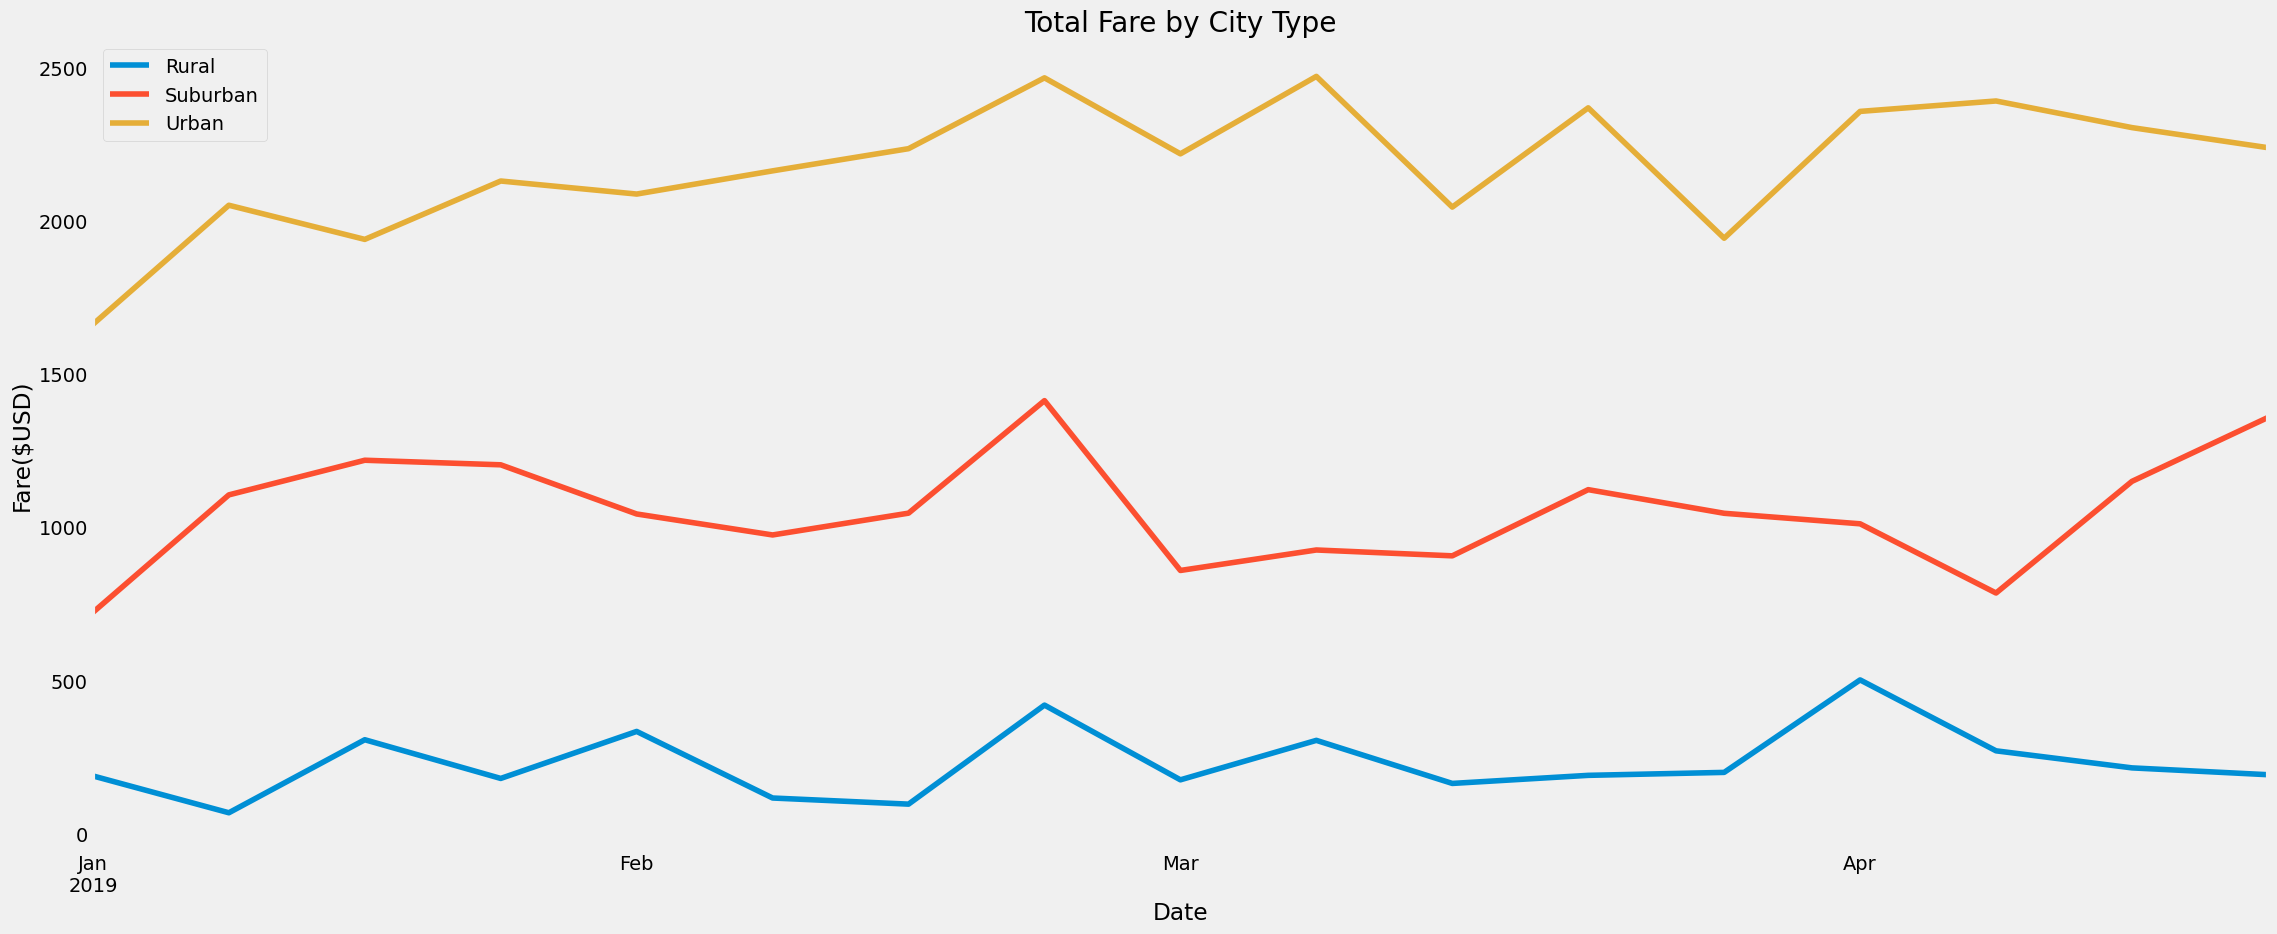

In [49]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create the plot.
weekly_sum_fares_df.plot(figsize=(25,10))

# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Fare($USD)")


# Create a title.
plt.title("Total Fare by City Type")

# Add a grid.
plt.grid()

# Add the legend.
plt.legend()

# Set the x limit.
# plt.xlim("2019-01-06","2019-04-29")

# Save Figure
plt.savefig("Analysis/PyBer_fare_summary.png")

# Show Figure
plt.show()